In [1]:
from osim.env import L2RunEnv
import numpy as np
from osim.env import ProstheticsEnv
import torch
import matplotlib.pyplot as plt
import scipy.stats as stats

ModuleNotFoundError: No module named 'osim'

In [2]:
def tcov(m, y=None):
    if y is not None:
        m = torch.cat((m, y), dim=0)
    m_exp = torch.mean(m, dim=1)
    x = m - m_exp[:, None]
    cov = 1 / (x.size(1) - 1) * x.mm(x.t())
    return cov

In [3]:
half_muscle_names = [
    "hamstring",
    "biceps femoris",
    "gluteus maximus",
    "iliopsoas",
    "rectus femoris",
    "vastus",
    "gastrocnemius",
    "soleus",
    "tibialis anterior"
]
muscle_names = []
for mn in half_muscle_names:
    muscle_names.append(mn + "_right")
for mn in half_muscle_names:
    muscle_names.append(mn + "_left")

colors = ['C' + str(j) for j in range(10)]
# colors = ['c0']

In [4]:
pydata = np.load('returns/skelefactor_montecarlo_bern1548857873.1717434.npy')

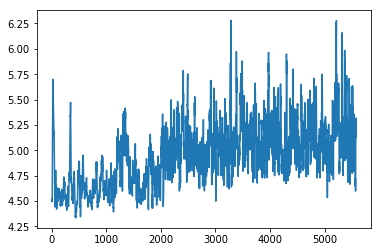

In [5]:
plt.plot(pydata)

In [2]:
observation = env.reset(project=True)

NameError: name 'env' is not defined

In [9]:
model_path = 'trained_models/skelefactor_montecarlo_bern.pt'
data = torch.load(model_path)


In [10]:
data[0].state_dict()

OrderedDict([('base.actor.0.weight',
              tensor([[ 0.3767,  0.0054,  0.2292,  ..., -0.0944, -0.2623, -0.0907],
                      [-0.0301, -0.1602, -0.0433,  ..., -0.0092,  0.2020,  0.0837],
                      [ 0.0792, -0.0539,  0.1521,  ..., -0.2077, -0.2789,  0.1078],
                      ...,
                      [-0.0504,  0.0098,  0.1456,  ...,  0.0114,  0.0666,  0.0027],
                      [ 0.1772,  0.1702, -0.1044,  ...,  0.0311, -0.0041, -0.0144],
                      [ 0.0735, -0.0634,  0.0406,  ..., -0.2188, -0.0818,  0.0773]])),
             ('base.actor.0.bias',
              tensor([ 0.1050, -0.0333,  0.0027,  0.0233, -0.0350, -0.1583, -0.1369,  0.0505,
                       0.0640, -0.0686, -0.1145,  0.1379,  0.0377,  0.1397, -0.0486,  0.0446,
                       0.0586, -0.0424, -0.0617,  0.1230,  0.0693,  0.0075, -0.0760, -0.0905,
                       0.1232, -0.0128, -0.1683, -0.0237,  0.0057,  0.0523, -0.0552,  0.0147,
                  

In [6]:
model_path = 'trained_models/ppo/skelefactor_montecarlo_bern.pt'
data = torch.load(model_path)
weight = data[0].state_dict()['dist.fc_mean.weight']
# stds = np.random.uniform(0, 1, (18))
stds = data[0].state_dict()['dist.logstd._bias']

In [5]:
normy = torch.distributions.Normal(loc=0, scale = stds.exp())

In [78]:
samples = normy.sample(torch.Size([1000]))

In [66]:
samples.dtype

torch.float64

In [27]:
samples.size()

torch.Size([1000, 7, 1])

In [80]:
res = torch.matmul(weight, samples)

In [71]:
ws = weight*stds.exp().view(7)
# mvn_cov = np.matmul(ws, ws.T)
# np.linalg.det(mvn_cov)

In [95]:
sample = np.random.normal(size=7)

In [97]:
stats.norm.pdf(sample)

array([0.14419541, 0.26243449, 0.26314391, 0.39789645, 0.39875623,
       0.39862921, 0.39744541])

In [103]:
action = np.matmul(weight, sample)
action

array([-0.18140655,  0.02054533,  1.74732611, -1.10052847,  0.2081834 ,
        1.08189012,  2.41179138,  0.76604258, -1.11083773,  0.12953414,
        1.40756425,  0.81626522,  0.28408946,  1.39876682, -3.28431824,
        1.92902141,  2.05251636, -2.43428453])

In [110]:
torch.distributions.lowrank_multivariate_normal

AttributeError: module 'torch.distributions' has no attribute 'lowrank_multivariate_normal'

In [61]:
def init_normc_(weight, gain=1):
    weight.normal_(0, 1)
    # TODO: Flag this
    # weight.abs_()
    weight *= gain / torch.sqrt(weight.pow(2).sum(1, keepdim=True))

In [67]:
init_normc_(weight)

In [68]:
weight

tensor([[-0.2632,  0.3379,  0.0670, -0.3855, -0.1485,  0.7991,  0.0523],
        [-0.0309, -0.4967, -0.3692, -0.2663,  0.4044, -0.3915, -0.4778],
        [-0.3726, -0.6230,  0.0611, -0.0485, -0.4726, -0.2862, -0.4022],
        [ 0.0839,  0.0199,  0.5795,  0.3880,  0.0659,  0.7034, -0.0841],
        [ 0.0935, -0.1041,  0.3239,  0.4816, -0.4674, -0.6022, -0.2498],
        [-0.8415, -0.1612, -0.1691, -0.3235,  0.0891, -0.1561,  0.3169],
        [ 0.3067, -0.3159, -0.3370,  0.2710,  0.6673,  0.2032,  0.3641],
        [ 0.3552, -0.0769,  0.0427, -0.4807, -0.7692, -0.2081,  0.0060],
        [-0.1328, -0.3060, -0.1665, -0.4379,  0.3774, -0.4467, -0.5721],
        [-0.1417,  0.3348,  0.4132,  0.1149,  0.5669,  0.2765,  0.5348],
        [ 0.6628,  0.5624,  0.2257, -0.3406, -0.2254, -0.1041,  0.1256],
        [ 0.0192,  0.4552, -0.4747,  0.2945, -0.5666,  0.1696, -0.3612],
        [-0.1095,  0.3782, -0.5806,  0.2503, -0.4301,  0.0894, -0.5022],
        [ 0.3070, -0.2506, -0.5259,  0.7144,  0.102

In [4]:
from torch.distributions import LowRankMultivariateNormal

In [77]:
lr =LowRankMultivariateNormal(loc=torch.zeros(18), cov_diag=torch.ones(18)*0.00001, cov_factor=ws)

In [78]:
lr.covariance_matrix

tensor([[ 1.0000, -0.4797, -0.2693,  0.4218, -0.6487,  0.1591, -0.2322,  0.0169,
         -0.3537,  0.2986,  0.1188,  0.2042,  0.1302, -0.4563,  0.3451, -0.5544,
         -0.0761,  0.4434],
        [-0.4797,  1.0000,  0.4244, -0.5382, -0.0330,  0.2003,  0.2160, -0.0930,
          0.9350, -0.4796, -0.4028, -0.2528, -0.0057,  0.2362,  0.1246,  0.4329,
          0.3954, -0.2857],
        [-0.2693,  0.4244,  1.0000, -0.2257,  0.5202,  0.2944, -0.4711,  0.3622,
          0.4307, -0.6983, -0.4812,  0.0305,  0.1373, -0.0075, -0.5227, -0.0159,
         -0.0828, -0.5943],
        [ 0.4218, -0.5382, -0.2257,  1.0000, -0.0530, -0.4279,  0.0856, -0.3311,
         -0.5248,  0.4657, -0.0332, -0.0379, -0.1643,  0.0575,  0.4667, -0.8327,
         -0.5995, -0.2702],
        [-0.6487, -0.0330,  0.5202, -0.0530,  1.0000, -0.2993, -0.4423,  0.3069,
         -0.0099, -0.4240,  0.0491,  0.1954,  0.1556,  0.1972, -0.5922,  0.2015,
         -0.4271, -0.4217],
        [ 0.1591,  0.2003,  0.2944, -0.4279, -0.29

In [102]:
# for i in range(mvn_cov.shape[0]):
#     mvn_cov[i,i] = 10
np.matmul(action,weight)

array([ 24.15776528,  -7.72680371,   6.93795293,  13.09955278,
       -38.44811692,  18.68132263, -14.11212882])

In [101]:
sample

array([ 1.42663754, -0.91522157,  0.91226717, -0.07245631, -0.03054373,
        0.0396245 , -0.08670831])

'1.0.0'

In [62]:
np.linalg.eigvals(np.round(mvn_cov, decimals=4))

array([35.71937  , 11.863307 ,  9.20087  ,  4.98846  ,  5.813501 ,
        3.0505269, -2.0141788, -5.326365 , -3.9961276, -5.0530543,
       -4.851316 , -4.247165 , -4.7328587, -4.3445644, -4.411961 ,
       -4.483128 , -4.5735254, -4.601792 ], dtype=float32)

In [20]:
np.linalg.cholesky(mvn_cov)

LinAlgError: Matrix is not positive definite

In [10]:
inputs = np.eye(5)*10
env = L2RunEnv(visualize=True)
for inp in inputs:
    inp = np.expand_dims(inp, 0)
    action = np.matmul(inp, np.transpose(weight))
#     action = action + bias
    env.reset()
    for j in range(5):
        env.step(action.flatten())
    input()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
g


KeyboardInterrupt: 

In [20]:
data[0].state_dict()

OrderedDict([('base.actor.0.weight',
              tensor([[ 0.3767,  0.0054,  0.2292,  ..., -0.0944, -0.2623, -0.0907],
                      [-0.0301, -0.1602, -0.0433,  ..., -0.0092,  0.2020,  0.0837],
                      [ 0.0792, -0.0539,  0.1521,  ..., -0.2077, -0.2789,  0.1078],
                      ...,
                      [-0.0504,  0.0098,  0.1456,  ...,  0.0114,  0.0666,  0.0027],
                      [ 0.1772,  0.1702, -0.1044,  ...,  0.0311, -0.0041, -0.0144],
                      [ 0.0735, -0.0634,  0.0406,  ..., -0.2188, -0.0818,  0.0773]])),
             ('base.actor.0.bias',
              tensor([ 0.1050, -0.0333,  0.0027,  0.0233, -0.0350, -0.1583, -0.1369,  0.0505,
                       0.0640, -0.0686, -0.1145,  0.1379,  0.0377,  0.1397, -0.0486,  0.0446,
                       0.0586, -0.0424, -0.0617,  0.1230,  0.0693,  0.0075, -0.0760, -0.0905,
                       0.1232, -0.0128, -0.1683, -0.0237,  0.0057,  0.0523, -0.0552,  0.0147,
                  

In [42]:
stds.numpy().shape

(18, 1)

C:\Users\clvco\Anaconda3\envs\opensim-rl\lib\site-packages\torch\serialization.py:434: SourceChangeWarning: source code of class 'distributions.DiagGaussian' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Text(0.5, 1.0, 'STDs')

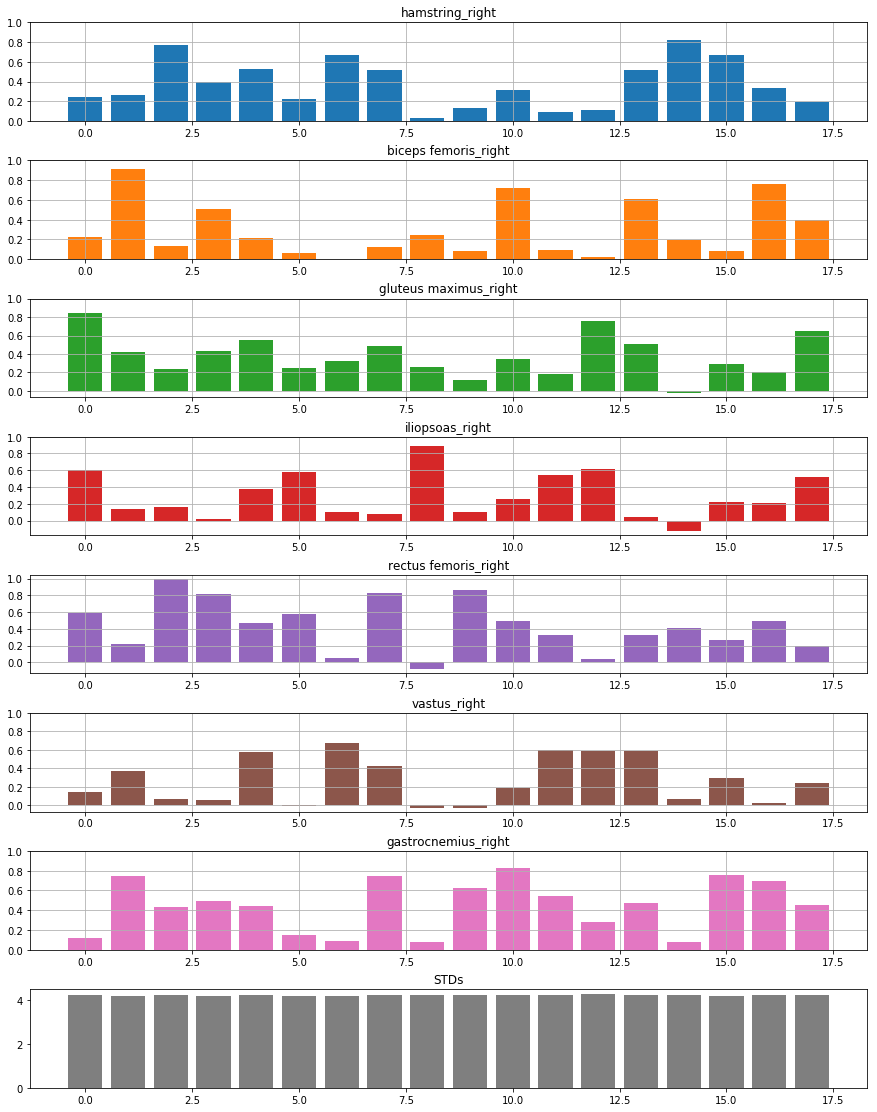

In [15]:
model_path = 'trained_models/skelefactor_montecarlo_bern.pt'
data = torch.load(model_path)
weight = data[0].state_dict()['dist.fc_mean.weight'].numpy()
stds = data[0].state_dict()['dist.logstd._bias']
sparse = weight.copy()
fig, axs = plt.subplots(nrows = sparse.shape[1]+1, ncols=1, figsize=(15,sparse.shape[1]*2.8))
for i in range(sparse.shape[1]):
#     plt.figure()
    axs[i].bar(np.arange(0, 18), sparse[:,i], color='C' +str(i))
    axs[i].set_yticks(np.arange(0, 1.2, 0.2))
    mn = muscle_names[i]
    axs[i].set_title(mn)
    axs[i].grid()
#     break
plt.subplots_adjust(hspace=0.4)
axs[-1].bar(np.arange(0, 18), stds[:,0], color='C' + str(i+1))
axs[-1].set_title("STDs")

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

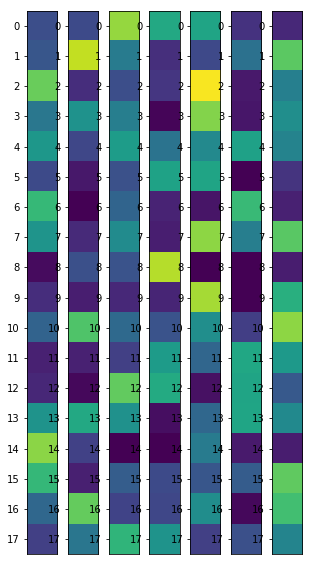

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(5,10))
for i in range(7):
    axs[i].imshow(sparse[:, i:i+1], vmin=0, vmax=1)
#     axs[i].grid(which='both')
    axs[i].set_yticks(range(0, 18))
    axs[i].set_xticks([])
# plt.imshow(sparse)
plt.colorbar()

In [53]:
plt.ylabel()

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

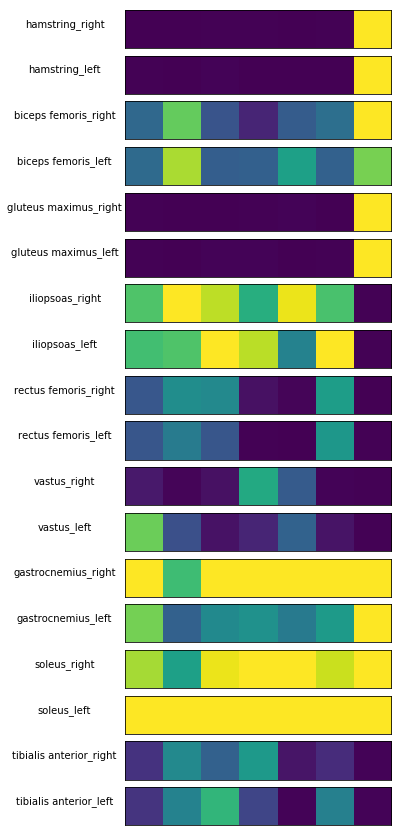

In [275]:
fig, axs = plt.subplots(nrows=18, ncols=1, figsize=(5,15))
order = range(0, 9)
new_order = []
for o in order:
    new_order.append(o)
    new_order.append(o + 9)
for i in range(len(new_order)):
    no = new_order[i]
    axs[i].imshow(sparse[no:no+1, :], vmin=0, vmax=1)
#     axs[i].grid(which='both')
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_ylabel(muscle_names[no], rotation=0, labelpad=60)
# plt.imshow(sparse)
# plt.colorbar()

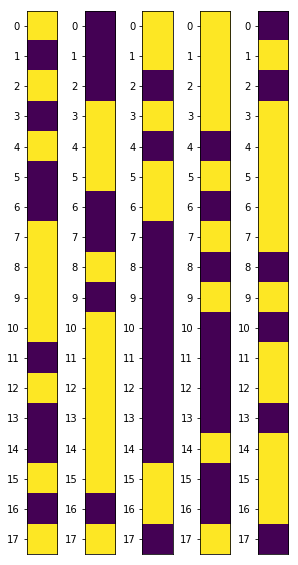

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(5,10))
for i in range(5):
    axs[i].imshow(sparse[:, i:i+1])
#     axs[i].grid(which='both')
    axs[i].set_yticks(range(0, 18))
    axs[i].set_xticks([])
# plt.imshow(sparse)
# plt.colorbar()

In [45]:
rando = np.random.normal(size=(3, 10000))

In [9]:
means = np.random.uniform(size=(3))
stds = np.random.uniform(low=0.5, high=1.0, size=(3))

array([[0.81051167, 0.81051167, 0.81051167, ..., 0.81051167, 0.81051167,
        0.81051167],
       [0.61928815, 0.61928815, 0.61928815, ..., 0.61928815, 0.61928815,
        0.61928815],
       [0.4125484 , 0.4125484 , 0.4125484 , ..., 0.4125484 , 0.4125484 ,
        0.4125484 ]])

In [16]:
linear_layer

array([[0.45932581, 0.20445536, 0.95618472],
       [0.35901118, 0.49222343, 0.10571187],
       [0.98629551, 0.0895999 , 0.29721557],
       [0.17883771, 0.43361445, 0.91591809],
       [0.30825233, 0.92203951, 0.32776456]])

In [12]:
lindos = []
for i in range(rando.shape[1]):
    lindos.append(np.matmul(linear_layer, rando[:,i]))
lindos = np.array(lindos)

(1000, 5)

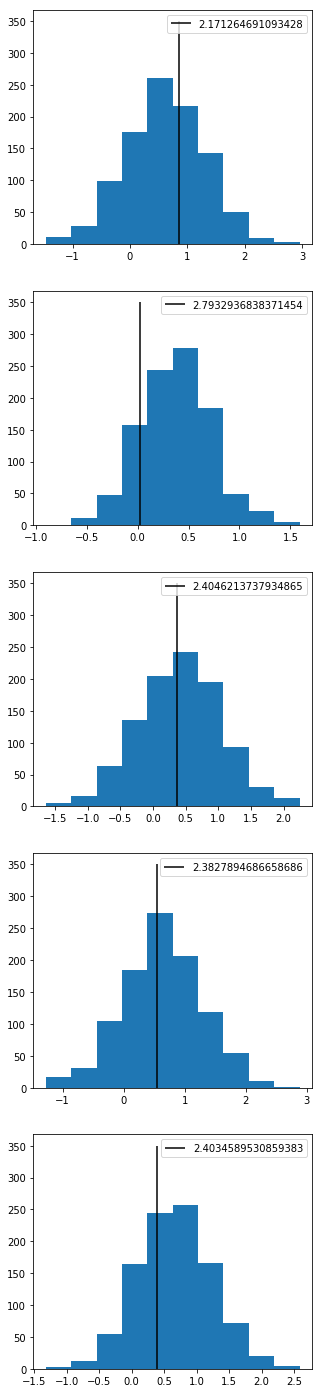

In [34]:
linear_layer = np.ones(shape=(5,3))
fig, axs = plt.subplots(nrows=lindos.shape[1], ncols=1, figsize=(5, 25))
for i in range(5):
    axs[i].hist(lindos[:,i])
    # lets estimate liklihood....
    pt = np.random.uniform()
    
    liklihood = lindos.shape[0]/np.sum(np.tanh(np.abs(lindos[:,i] - pt)))
    axs[i].vlines(pt, 0, 350, label=str(liklihood))
    axs[i].legend()
#     axs[i].scatter(0.8, 350, color='r')


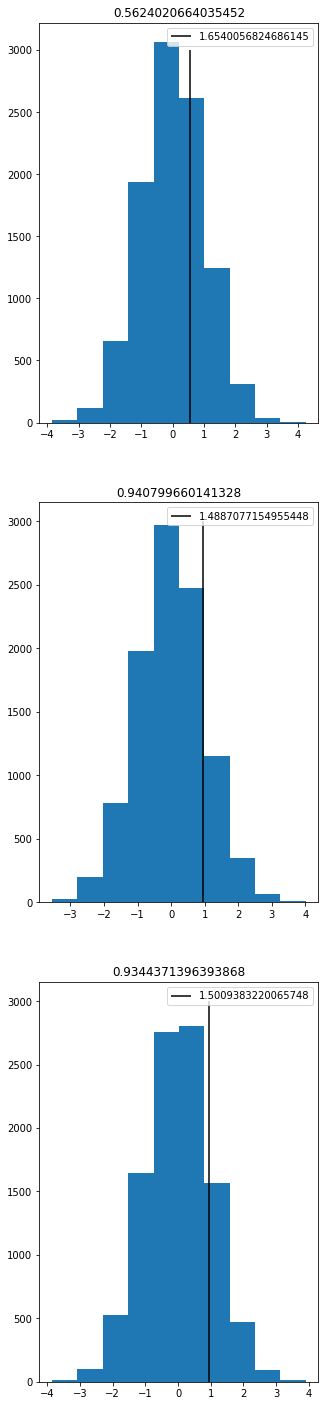

In [47]:
fig, axs = plt.subplots(nrows=rando.shape[0], ncols=1, figsize=(5, 25))
for i in range(3):
    axs[i].hist(rando[i,:])
    pt = np.random.uniform()
    liklihood = rando.shape[1]/np.sum(np.tanh(np.abs(rando[i,:] - pt)))
    axs[i].vlines(pt, 0, 3000, label=str(liklihood))
    axs[i].legend()
    axs[i].set_title(str(pt))


In [227]:
normy = torch.distributions.normal.Normal(mean,torch.ones(mean.shape))

In [230]:
normy.log_prob(mean)

tensor([-0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189,
        -0.9189, -0.9189, -0.9189, -0.9189])

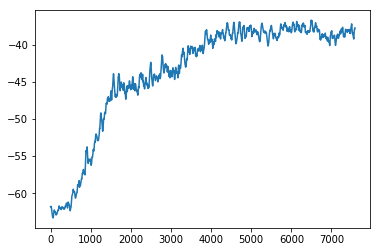

In [217]:
returns = np.load('returns/skelefactor_walk_good_bio_positive_enforcement_7fact.npy')
plt.plot(np.convolve(np.ones(50)/50, returns, mode='valid'))

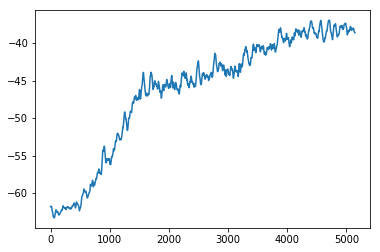

In [65]:
import gym

In [66]:
from gym.envs.classic_control import AcrobotEnv

In [213]:
e = AcrobotEnv()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [214]:
e.action_space

Discrete(3)

In [82]:
regular = [7, 50, 100, 150, 200, 250, 300]
regular_rewards = [-500, -173.3, -95, -102, -83.8, -92.2, -81.8]

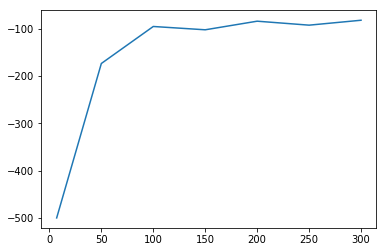

In [84]:
plt.figure()
plt.plot(regular, regular_rewards, label='reg')

In [237]:
mean = torch.ones((12)).float()
normy = torch.distributions.Normal(mean,mean)

In [116]:
mean.size() + mean.size()

torch.Size([12, 4, 12, 4])

In [105]:
mean.index_add_(0, (torch.ones(1)*11).long(), torch.ones(1))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.])

In [295]:
hack = torch.ones((200))
samples = normy.sample(hack.size())

TypeError: 'module' object is not callable

In [234]:
samples.shape

torch.Size([1000, 12])

In [322]:
linear = torch.randn((12, 24))*12

In [323]:
r = torch.matmul(samples, linear)

In [324]:
m = torch.matmul(mean, linear)

In [305]:
m.shape

torch.Size([24])

In [286]:
normy.log_prob(mean)

tensor([-0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189, -0.9189,
        -0.9189, -0.9189, -0.9189, -0.9189])

In [273]:
for i,m in enumerate(mean):
#     print(sampl)
#     print(1000/torch.sum(torch.tanh(torch.abs(samples[:,i] - m))))
    print(torch.log(samples.shape[0]/4.5/torch.sum((torch.abs(samples[:,i] - m -166)))))
    

tensor(-6.6163)
tensor(-6.6172)
tensor(-6.6159)
tensor(-6.6171)
tensor(-6.6165)
tensor(-6.6160)
tensor(-6.6160)
tensor(-6.6163)
tensor(-6.6161)
tensor(-6.6163)
tensor(-6.6159)
tensor(-6.6166)


In [278]:
# Building a Logistic Distribution
# X ~ Uniform(0, 1)
# f = a + b * logit(X)
# Y ~ f(X) ~ Logistic(a, b)
base_distribution = torch.distributions.Uniform(0, 1)
transforms = [torch.distributions.transforms.().inv, AffineTransform(loc=a, scale=b)]
logistic = TransformedDistribution(base_distribution, transforms)

AttributeError: module 'torch' has no attribute 'SigmoidTransform'

In [279]:
import scipy

In [292]:
mean.shape

torch.Size([12])

In [306]:
r.shape

torch.Size([2000, 24])

In [325]:
gkde = scipy.stats.gaussian_kde(r[:,0].numpy())

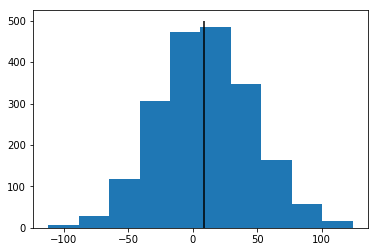

In [326]:
plt.figure()
plt.hist(r[:,0].flatten())
plt.vlines(m[0], 0, 500)

In [334]:
torch.from_numpy(gkde.logpdf(m[0]-6))

tensor([-4.5232], dtype=torch.float64)

In [320]:
m[0]

tensor(-3.7786)